### Resumo do Yahoo Finance

As empresas deslistadas seam da plataforma -> não serve então para fazer backtesting

Vários erros de ajuste, como no caso da Braskem em que o dividendo de R$ 1.69 foi computado duas vezes -> veja células abaixo

In [39]:
from pathlib import Path
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100, 'figure.figsize':(5,5)})


In [9]:
stocks_yf = [
    'CRUZ3', 'BRPR3', 'PTBL3', 'EQTL3', 'LIGT3', 'TOTS3', 'UGPA4', 'AUTM3', 'CIEL3',
    'VALE5', 'BRAP4', 'SBSP3', 'LAME4', 'WHRL4', 'CMIG4', 'ECOR3', 'CSMG3', 'GETI4',
    'CCIM3', 'BRKM5', 'RAPT4', 'SHUL4', 'ENGI4', 'CPFE3', 'HBOR3', 'VLID3', 'TRPL4',
    'ETER3', 'EVEN3', 'EUCA4'
]
stocks_yf = '.SA '.join(stocks_yf)
stocks_yf

'CRUZ3.SA BRPR3.SA PTBL3.SA EQTL3.SA LIGT3.SA TOTS3.SA UGPA4.SA AUTM3.SA CIEL3.SA VALE5.SA BRAP4.SA SBSP3.SA LAME4.SA WHRL4.SA CMIG4.SA ECOR3.SA CSMG3.SA GETI4.SA CCIM3.SA BRKM5.SA RAPT4.SA SHUL4.SA ENGI4.SA CPFE3.SA HBOR3.SA VLID3.SA TRPL4.SA ETER3.SA EVEN3.SA EUCA4'

In [10]:
data = yf.download(stocks_yf, start="2011-04-11", end="2012-04-09")
data

[*********************100%***********************]  30 of 30 completed

7 Failed downloads:
- GETI4.SA: No data found for this date range, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- EUCA4: No data found, symbol may be delisted
- UGPA4.SA: No data found for this date range, symbol may be delisted
- CCIM3.SA: No data found, symbol may be delisted
- CRUZ3.SA: No data found for this date range, symbol may be delisted
- AUTM3.SA: Data doesn't exist for startDate = 1302490800, endDate = 1333940400


Adj Close                                                     \
            AUTM3.SA   BRAP4.SA   BRKM5.SA  BRPR3.SA CCIM3.SA  CIEL3.SA   
Date                                                                      
2011-04-11       NaN  17.127111  11.809228  8.581648      NaN  4.456356   
2011-04-12       NaN  16.682455  11.574088  8.483571      NaN  4.456356   
2011-04-13       NaN  16.456160  11.621118  8.385498      NaN  4.475958   
2011-04-14       NaN  16.344994  11.584541  8.557130      NaN  4.430219   
2011-04-15       NaN  16.356905  11.579313  8.508093      NaN  4.443285   
...              ...        ...        ...       ...      ...       ...   
2011-11-15       NaN        NaN        NaN       NaN      NaN       NaN   
2011-12-30       NaN        NaN        NaN       NaN      NaN       NaN   
2012-01-25       NaN        NaN        NaN       NaN      NaN       NaN   
2012-02-21       NaN        NaN        NaN       NaN      NaN       NaN   
2012-02-22       NaN        NaN        NaN       NaN      NaN       NaN   

                                                    ...    Volume            \
            CMIG4.SA   CPFE3.SA CRUZ3.SA  CSMG3.SA  ...  PTBL3.SA  RAPT4.SA   
Date                                                ...                       
2011-04-11  3.959227  11.672333      NaN  5.277096  ...   26900.0  840407.0   
2011-04-12  3.933726  11.896698      NaN  5.223001  ...  118400.0  702603.0   
2011-04-13  3.959227  11.822787      NaN  5.241653  ...   16800.0  756699.0   
2011-04-14  3.936279  11.909896      NaN  5.241653  ...     100.0  565441.0   
2011-04-15  3.901848  11.999643      NaN  5.241653  ...       0.0  538137.0   
...              ...        ...      ...       ...  ...       ...       ...   
2011-11-15       NaN        NaN      NaN       NaN  ...       NaN       NaN   
2011-12-30       NaN        NaN      NaN       NaN  ...       NaN       NaN   
2012-01-25       NaN        NaN      NaN       NaN  ...       NaN       NaN   
2012-02-21       NaN        NaN      NaN       NaN  ...       NaN       NaN   
2012-02-22       NaN        NaN      NaN       NaN  ...       NaN       NaN   

                                                                         \
            SBSP3.SA SHUL4.SA   TOTS3.SA  TRPL4.SA UGPA4.SA    VALE5.SA   
Date                                                                      
2011-04-11  695400.0  22400.0   532610.0  390528.0      NaN  11795700.0   
2011-04-12  510000.0    560.0   397654.0  514384.0      NaN  16594900.0   
2011-04-13  616200.0   3360.0  1839788.0  413524.0      NaN  19791000.0   
2011-04-14  591900.0  25760.0   431919.0  502685.0      NaN  14808600.0   
2011-04-15  464400.0  10640.0   709946.0  369146.0      NaN  11529500.0   
...              ...      ...        ...       ...      ...         ...   
2011-11-15       NaN      NaN        NaN       NaN      NaN         0.0   
2011-12-30       NaN      NaN        NaN       NaN      NaN         0.0   
2012-01-25       NaN      NaN        NaN       NaN      NaN         0.0   
2012-02-21       NaN      NaN        NaN       NaN      NaN         0.0   
2012-02-22       NaN      NaN        NaN       NaN      NaN  13888700.0   

                               
            VLID3.SA WHRL4.SA  
Date                           
2011-04-11  142417.0   1500.0  
2011-04-12  383691.0   5200.0  
2011-04-13  107811.0    300.0  
2011-04-14   83611.0    500.0  
2011-04-15   80586.0      0.0  
...              ...      ...  
2011-11-15       NaN      NaN  
2011-12-30       NaN      NaN  
2012-01-25       NaN      NaN  
2012-02-21       NaN      NaN  
2012-02-22       NaN      NaN  

[257 rows x 180 columns]

In [11]:
df1 = yf.download('CIEL3.SA', start="2010-01-01", end="2022-06-10")
df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.695963,7.937089,7.635681,7.937089,4.936293,7856713
2010-01-05,7.911972,7.962207,7.756244,7.881831,4.901931,4355949
2010-01-06,7.836620,7.911972,7.786385,7.861737,4.889431,10207675
2010-01-07,7.796432,8.148075,7.786385,8.047606,5.005028,17911904
2010-01-08,8.067700,8.213381,7.937089,7.947136,4.942543,8385032
...,...,...,...,...,...,...
2022-06-03,3.970000,3.980000,3.860000,3.950000,3.950000,16063400
2022-06-06,3.970000,4.020000,3.890000,3.970000,3.970000,10812300
2022-06-07,3.940000,3.940000,3.770000,3.800000,3.800000,21379800


In [12]:
PROCESSED_PATH = Path("/mnt/aq_disk/data/HistoricalQuotations/processed/")
path = PROCESSED_PATH / "base_adj.feather"
df_b3 = pd.read_feather(path)
df_b3

,datneg,codneg,codisi,nomres,especi,codbdi,tpmerc,dismes,datven,prazot,...,premed,preult,preofc,preofv,preexe,totneg,quatot,voltot,evento,ajuste
0,2022-02-03,5GTK11,BR5GTKCTF000,INVESTO 5GTK,CI,14,10,100,NaT,0,...,95.70,94.86,94.86,97.70,0.0,85,20848.0,1995324.60,,1.0
1,2022-02-04,5GTK11,BR5GTKCTF000,INVESTO 5GTK,CI,14,10,100,NaT,0,...,95.77,95.84,95.37,95.84,0.0,50,1107.0,106019.05,,1.0
2,2022-02-07,5GTK11,BR5GTKCTF000,INVESTO 5GTK,CI,14,10,100,NaT,0,...,94.83,94.46,93.50,94.46,0.0,32,2070.0,196298.97,,1.0
3,2022-02-08,5GTK11,BR5GTKCTF000,INVESTO 5GTK,CI,14,10,100,NaT,0,...,95.69,95.93,95.36,95.93,0.0,18,489.0,46794.40,,1.0
4,2022-02-09,5GTK11,BR5GTKCTF000,INVESTO 5GTK,CI,14,10,100,NaT,0,...,96.84,97.46,97.46,99.04,0.0,24,2731.0,264477.80,,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10938219,2000-11-30,ZIVI4FF,BRZIVIACNPR1,ZIVI,PN *,96,20,136,NaT,0,...,0.45,0.45,0.21,1.00,0.0,2,108000.0,48.60,,1.0
10938220,2000-12-04,ZIVI4FF,BRZIVIACNPR1,ZIVI,PN *,96,20,136,NaT,0,...,0.45,0.45,0.21,0.00,0.0,1,11000.0,4.95,,1.0
10938221,2000-12-06,ZIVI4FF,BRZIVIACNPR1,ZIVI,PN *,96,20,136,NaT,0,...,0.40,0.40,0.21,0.46,0.0,2,762000.0,304.80,,1.0
10938222,2013-12-18,ZNTE6L,BRZNTEACNPB8,FERR ZANETTE,PNB,52,17,104,NaT,0,...,0.82,0.82,0.00,0.00,0.0,1,744186.0,610232.52,,1.0


In [13]:
df2 = df_b3.query('codneg == "CIEL3" and datneg > "2010-01-01"').copy()
df2

,datneg,codneg,codisi,nomres,especi,codbdi,tpmerc,dismes,datven,prazot,...,premed,preult,preofc,preofv,preexe,totneg,quatot,voltot,evento,ajuste
2525742,2010-01-04,CIEL3,BRCIELACNOR3,CIELO,ON NM,2,10,100,NaT,0,...,4.331619,4.404092,4.379005,4.404092,0.0,4256,1.434886e+07,62193920.0,,0.27874
2525743,2010-01-05,CIEL3,BRCIELACNOR3,CIELO,ON NM,2,10,100,NaT,0,...,4.348344,4.373430,4.337194,4.373430,0.0,3093,7.926743e+06,34471925.0,,0.27874
2525744,2010-01-06,CIEL3,BRCIELACNOR3,CIELO,ON NM,2,10,100,NaT,0,...,4.370643,4.362281,4.362281,4.365068,0.0,2665,1.852085e+07,80989763.0,,0.27874
2525745,2010-01-07,CIEL3,BRCIELACNOR3,CIELO,ON NM,2,10,100,NaT,0,...,4.437540,4.465414,4.462627,4.465414,0.0,5930,3.292603e+07,146164431.0,,0.27874
2525746,2010-01-08,CIEL3,BRCIELACNOR3,CIELO,ON NM,2,10,100,NaT,0,...,4.476564,4.409666,4.409666,4.412454,0.0,4248,1.532826e+07,68622984.0,,0.27874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528830,2022-06-03,CIEL3,BRCIELACNOR3,CIELO,ON NM,2,10,149,NaT,0,...,3.920000,3.950000,3.940000,3.960000,0.0,15701,1.606340e+07,63102123.0,,1.00000
2528831,2022-06-06,CIEL3,BRCIELACNOR3,CIELO,ON NM,2,10,149,NaT,0,...,3.950000,3.970000,3.960000,3.980000,0.0,10965,1.081230e+07,42778016.0,,1.00000
2528832,2022-06-07,CIEL3,BRCIELACNOR3,CIELO,ON NM,2,10,149,NaT,0,...,3.820000,3.800000,3.800000,3.810000,0.0,21085,2.137980e+07,81713682.0,,1.00000
2528833,2022-06-08,CIEL3,BRCIELACNOR3,CIELO,ON NM,2,10,149,NaT,0,...,3.760000,3.770000,3.760000,3.780000,0.0,19711,2.879840e+07,108538886.0,,1.00000


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

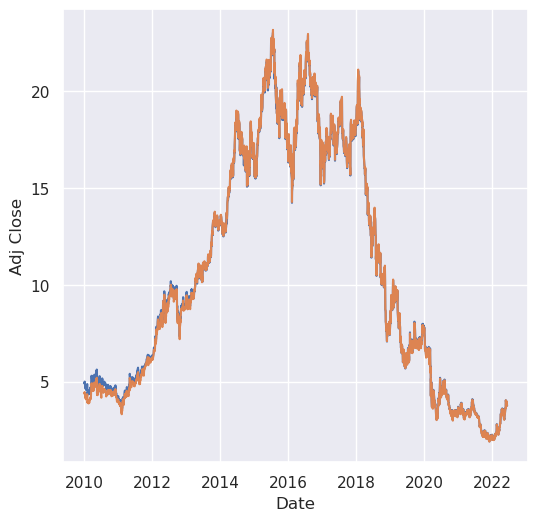

In [14]:
sns.lineplot(x="Date", y="Adj Close", data=df1)
sns.lineplot(x="datneg", y="preult", data=df2)

In [15]:
df1 = yf.download('MGLU3.SA', start="2010-01-01", end="2022-06-10")
df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-05-02,0.503125,0.518750,0.503125,0.514062,0.463173,280003200
2011-05-03,0.515625,0.521562,0.506250,0.509375,0.458950,33670400
2011-05-04,0.510000,0.515000,0.510000,0.515000,0.464018,39203200
2011-05-05,0.512812,0.512812,0.510000,0.511875,0.461202,35097600
2011-05-06,0.510937,0.511875,0.500000,0.508125,0.457824,38672000
...,...,...,...,...,...,...
2022-06-03,3.760000,3.790000,3.580000,3.590000,3.590000,140038500
2022-06-06,3.630000,3.650000,3.380000,3.400000,3.400000,142570700
2022-06-07,3.360000,3.380000,3.260000,3.290000,3.290000,156194200


In [16]:
df2 = df_b3.query('codneg == "MGLU3" and datneg > "2010-01-01"').copy()
df2

,datneg,codneg,codisi,nomres,especi,codbdi,tpmerc,dismes,datven,prazot,...,premed,preult,preofc,preofv,preexe,totneg,quatot,voltot,evento,ajuste
6328798,2011-05-02,MGLU3,BRMGLUACNOR2,MAGAZ LUIZA,ON NM,2,10,100,NaT,0,...,0.471826,0.473553,0.472402,0.473553,0.0,9095,3.039556e+08,143468804.0,,0.028787
6328799,2011-05-03,MGLU3,BRMGLUACNOR2,MAGAZ LUIZA,ON NM,2,10,100,NaT,0,...,0.470962,0.469235,0.469235,0.470387,0.0,1619,3.693279e+07,17392996.0,,0.028787
6328800,2011-05-04,MGLU3,BRMGLUACNOR2,MAGAZ LUIZA,ON NM,2,10,100,NaT,0,...,0.471250,0.474417,0.472114,0.474417,0.0,1168,4.279299e+07,20178219.0,,0.028787
6328801,2011-05-05,MGLU3,BRMGLUACNOR2,MAGAZ LUIZA,ON NM,2,10,100,NaT,0,...,0.471538,0.471538,0.470962,0.471538,0.0,827,3.871830e+07,18256498.0,,0.028787
6328802,2011-05-06,MGLU3,BRMGLUACNOR2,MAGAZ LUIZA,ON NM,2,10,100,NaT,0,...,0.468371,0.468084,0.464917,0.468084,0.0,1111,4.206698e+07,19709202.0,,0.028787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331544,2022-06-03,MGLU3,BRMGLUACNOR2,MAGAZ LUIZA,ON NM,2,10,119,NaT,0,...,3.630000,3.590000,3.580000,3.590000,0.0,48644,1.400385e+08,508623523.0,,1.000000
6331545,2022-06-06,MGLU3,BRMGLUACNOR2,MAGAZ LUIZA,ON NM,2,10,119,NaT,0,...,3.470000,3.400000,3.390000,3.400000,0.0,32728,1.425707e+08,496111255.0,,1.000000
6331546,2022-06-07,MGLU3,BRMGLUACNOR2,MAGAZ LUIZA,ON NM,2,10,119,NaT,0,...,3.310000,3.290000,3.290000,3.300000,0.0,38139,1.561942e+08,518242543.0,,1.000000
6331547,2022-06-08,MGLU3,BRMGLUACNOR2,MAGAZ LUIZA,ON NM,2,10,119,NaT,0,...,3.250000,3.220000,3.220000,3.230000,0.0,28217,1.528156e+08,498097861.0,,1.000000


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

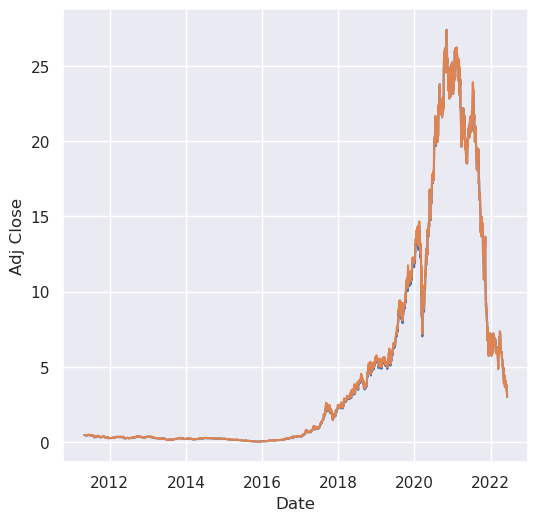

In [17]:
sns.lineplot(x="Date", y="Adj Close", data=df1)
sns.lineplot(x="datneg", y="preult", data=df2)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

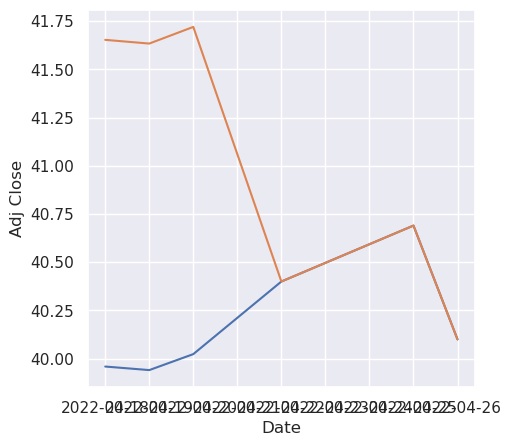

In [49]:
df1 = yf.download('BRKM3.SA', start="2022-04-15", end="2022-04-27")
df2 = df_b3.query('codneg == "BRKM3" and datneg > "2022-04-15" and datneg < "2022-04-27"').copy()
sns.lineplot(x="Date", y="Adj Close", data=df1)
sns.lineplot(x="datneg", y="preult", data=df2)

In [48]:
# Houve apenas um dividendo de 1.69 e não dois, por isso o ajuste ERRADO do Yahoo F.
tk = yf.Ticker('BRKM3.SA')
tk.history(start='2022-04-15', end='2022-04-27')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-18,39.885507,40.143605,39.636625,39.959248,7100,0.000000,0
2022-04-19,40.097516,40.097516,39.572101,39.940815,17900,0.000000,0
2022-04-20,40.771935,40.771935,38.910817,40.023651,16400,1.696348,0
2022-04-22,40.730000,41.290001,40.029999,40.400002,10000,1.696348,0
2022-04-25,40.650002,41.189999,40.200001,40.689999,20000,0.000000,0
2022-04-26,40.700001,41.189999,40.009998,40.099998,9100,0.000000,0


In [43]:
# O fator deveria ser aproximadamente 1.69 / 41 = 4% e não 8%
df2

,datneg,codneg,codisi,nomres,especi,codbdi,tpmerc,dismes,datven,prazot,...,premed,preult,preofc,preofv,preexe,totneg,quatot,voltot,evento,ajuste
1967747,2022-04-18,BRKM3,BRBRKMACNOR1,BRASKEM,ON N1,2,10,118,NaT,0,...,41.57600,41.652868,41.566392,41.652868,0.0,35,7389.287065,307257.0,,0.96085
1967748,2022-04-19,BRKM3,BRBRKMACNOR1,BRASKEM,ON N1,2,10,118,NaT,0,...,41.45109,41.633651,41.249311,41.796996,0.0,67,18629.329361,772266.0,DIVIDENDO,0.96085
1967749,2022-04-20,BRKM3,BRBRKMACNOR1,BRASKEM,ON ED N1,2,10,119,NaT,0,...,41.28000,41.720000,40.930000,42.500000,0.0,102,16400.000000,677078.0,,1.00000
1967750,2022-04-22,BRKM3,BRBRKMACNOR1,BRASKEM,ON ED N1,2,10,119,NaT,0,...,40.55000,40.400000,40.100000,40.390000,0.0,57,10000.000000,405530.0,,1.00000


In [19]:
df2['change'] = df2.premed / df2.premed.shift(1)
df2

,datneg,codneg,nomres,codisi,especi,codbdi,tpmerc,preabe,premax,premin,...,preexe,totneg,quatot,voltot,dismes,datven,prazot,event2,ajuste,change
1959822,2010-01-04,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,6.895801,6.929114,6.895801,...,0.0,7,1981.205694,13702.0,107,NaT,0,,0.555217,NaN
1959823,2010-01-05,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,6.929114,7.090127,6.884697,...,0.0,24,9545.809252,66392.0,107,NaT,0,,0.555217,1.004819
1959824,2010-01-06,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,7.106784,7.217827,7.023501,...,0.0,28,12067.343772,86701.0,107,NaT,0,,0.555217,1.034373
1959825,2010-01-07,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,7.212275,7.323318,7.084575,...,0.0,13,19812.056939,142894.0,107,NaT,0,,0.555217,1.003864
1959826,2010-01-08,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,7.256692,7.323318,7.140097,...,0.0,10,4142.520996,30014.0,107,NaT,0,,0.555217,1.003849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962734,2022-05-31,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,44.190000,44.500000,43.530000,...,0.0,105,21600.000000,949526.0,119,NaT,0,,1.000000,1.021855
1962735,2022-06-01,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,44.600000,44.950000,42.450000,...,0.0,64,14600.000000,640693.0,119,NaT,0,,1.000000,0.998407
1962736,2022-06-02,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,44.950000,45.460000,44.040000,...,0.0,32,6700.000000,303084.0,119,NaT,0,,1.000000,1.030766
1962737,2022-06-03,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,44.850000,45.290000,44.500000,...,0.0,27,3500.000000,156697.0,119,NaT,0,,1.000000,0.989830


In [20]:
df2.sort_values(by='change')

,datneg,codneg,nomres,codisi,especi,codbdi,tpmerc,preabe,premax,premin,...,preexe,totneg,quatot,voltot,dismes,datven,prazot,event2,ajuste,change
1962184,2020-03-12,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,17.018653,19.396508,16.220373,...,0.0,143,84311.257054,1476998.0,117,NaT,0,,0.849234,0.733286
1962189,2020-03-19,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,15.787263,15.795755,14.105779,...,0.0,217,96793.091199,1402117.0,117,NaT,0,,0.849234,0.796729
1961020,2015-03-11,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,6.423311,6.423311,5.065642,...,0.0,235,64958.394810,346096.0,111,NaT,0,,0.640410,0.835176
1961992,2019-06-04,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,29.764913,29.764913,27.400256,...,0.0,495,160981.486632,4582933.0,116,NaT,0,,0.826803,0.864207
1962191,2020-03-23,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,13.417900,13.587747,11.719431,...,0.0,183,42862.147441,546968.0,117,NaT,0,,0.849234,0.887707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961766,2018-06-15,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,37.834512,40.678715,37.834512,...,0.0,83,17295.531622,680934.0,116,NaT,0,,0.826803,1.138995
1962194,2020-03-26,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,14.139749,16.220373,14.139749,...,0.0,208,62997.936486,975570.0,117,NaT,0,,0.849234,1.139375
1962185,2020-03-13,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,19.727710,22.071596,19.523893,...,0.0,92,24610.408833,497260.0,117,NaT,0,,0.849234,1.153734
1961364,2016-08-30,BRKM3,BRASKEM,BRBRKMACNOR1,ON N1,2,10,13.143411,14.831086,12.924232,...,0.0,42,19162.453463,273239.0,113,NaT,0,,0.730595,1.160619


In [17]:
df.query('datneg > "2020-10-08" and datneg < "2020-10-17"')

,datneg,codneg,nomres,codisi,especi,codbdi,tpmerc,preabe,premax,premin,...,preexe,totneg,quatot,voltot,dismes,datven,prazot,event2,ajuste,change
6310174,2020-10-09,MGLU3,MAGAZ LUIZA,BRMGLUACNOR2,ON NM,2,10,22.934463,24.494206,22.859596,...,0.0,83295,9.253086e+07,2.212304e+09,116,NaT,0,,0.249559,1.023385
6310175,2020-10-13,MGLU3,MAGAZ LUIZA,BRMGLUACNOR2,ON NM,2,10,24.838598,26.053950,24.831111,...,0.0,89675,9.487860e+07,2.421485e+09,116,NaT,0,,0.249559,1.083025
6310176,2020-10-14,MGLU3,MAGAZ LUIZA,BRMGLUACNOR2,ON EB NM,2,10,26.453244,27.201921,24.995820,...,0.0,83711,8.374586e+07,2.167625e+09,117,NaT,0,,0.998236,1.065006
6310177,2020-10-15,MGLU3,MAGAZ LUIZA,BRMGLUACNOR2,ON EB NM,2,10,24.975855,26.024003,24.955890,...,0.0,96438,3.481142e+07,8.904858e+08,117,NaT,0,,0.998236,0.944151
6310178,2020-10-16,MGLU3,MAGAZ LUIZA,BRMGLUACNOR2,ON EB NM,2,10,25.714550,26.004038,25.115608,...,0.0,75241,3.273085e+07,8.373471e+08,117,NaT,0,,0.998236,1.029576
